In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

In [2]:
# Set Parameters
n_samples = 1000000
num_bins = 20
length_strings = 3
num_values = 5
range_of_numbers = 100

In [3]:
def create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers):
    randoms = random.sample(range(range_of_numbers), num_values)
    sample_repetetive_numbers = [choice(randoms) for _ in range(n_samples)]
    return sample_repetetive_numbers

In [4]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples).to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [5]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

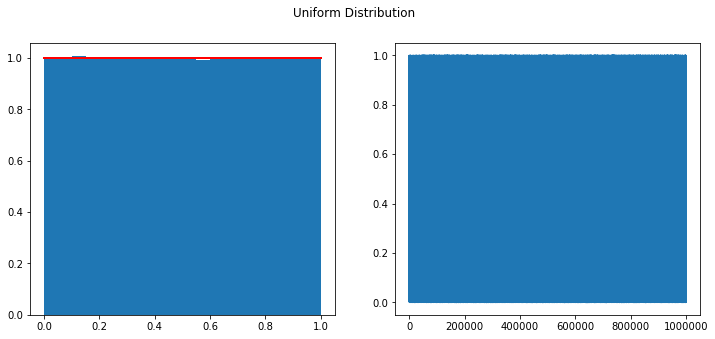

In [6]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform)
    return sample_uniform

sample_uniform=uniform_distribution()

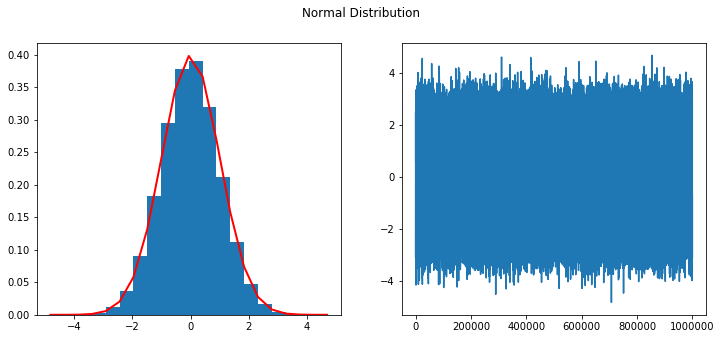

In [7]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Normal Distribution')
        count, bins, ignored = ax1.hist(sample_normal, num_bins, density=True)
        ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')
        ax2.plot(sample_normal)
    return sample_normal

sample_normal = normal_distribution()

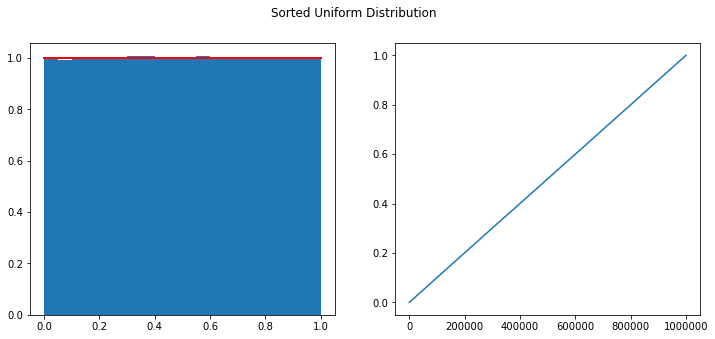

In [8]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_sorted)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

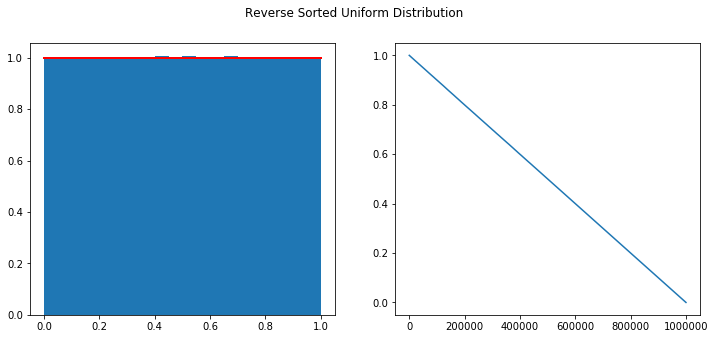

In [9]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Reverse Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_reverse_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_reverse_sorted)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

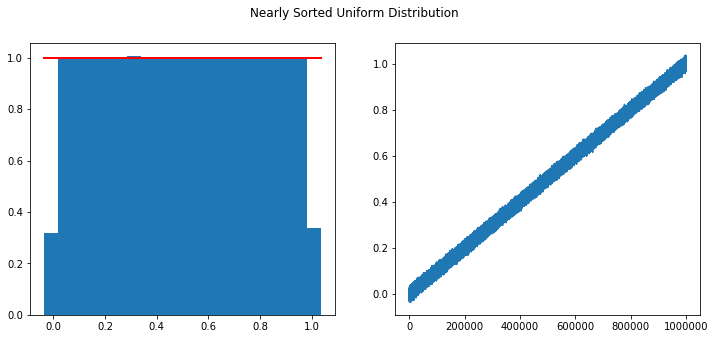

In [10]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Nearly Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_nearly_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_nearly_sorted)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

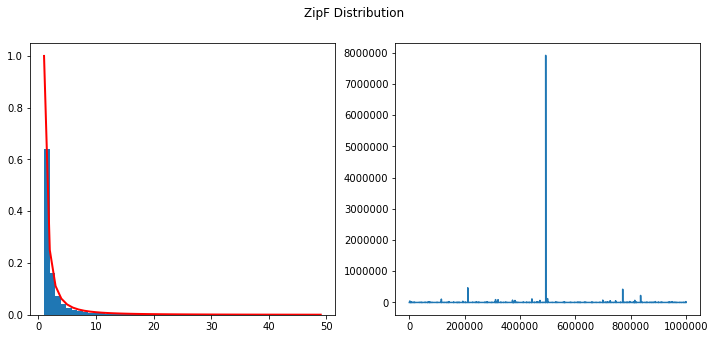

In [11]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('ZipF Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 50, density=True)
        x = np.arange(1., 50.)
        y = x**(-a) / special.zetac(a)
        ax1.plot(x, y/max(y), linewidth=2, color='r')
        ax2.plot(sample_zipf)
    return sample_zipf
sample_zipf = zipf_distribution()

In [12]:
def create_df_distributions():
    sample_uniform=uniform_distribution(display=False)
    sample_normal = normal_distribution(display=False)
    sample_uniform_sorted = uniform_sorted_distribution(display=False)
    sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False)
    sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False)
    sample_zipf = zipf_distribution(display=False)
    sample_strings = create_strings(n_samples=n_samples, length_strings=length_strings)
    sample_dates = create_dates(n_samples=n_samples)
    sample_repetetive_numbers = create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers)
    df_distribions = pd.DataFrame()#.astype(np.float64)
    df_distribions["Uniform"] = sample_uniform
    df_distribions["Normal"] = sample_normal
    df_distribions["Uniform_Sorted"] = sample_uniform_sorted
    df_distribions["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    df_distribions["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    df_distribions["Zipf"] = sample_zipf
    df_distribions["Strings"] = sample_strings
    df_distribions["Dates"] = sample_dates
    df_distribions["Repetetive_Numbers"] = sample_repetetive_numbers
    
    return df_distribions

In [14]:
def create_df_distribution(n_samples=n_samples, dist_type="Uniform"):
    df_distribion = pd.DataFrame().astype(np.float64)
    if dist_type == "Uniform":
        sample_uniform= uniform_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform"] = sample_uniform
    if dist_type == "Normal":
        sample_normal = normal_distribution(display=False, n_samples=n_samples)
        df_distribion["Normal"] = sample_normal
    if dist_type == "Uniform_Sorted":
        sample_uniform_sorted = uniform_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Sorted"] = sample_uniform_sorted
    if dist_type == "Uniform_Reverse_Sorted":
        sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    if dist_type == "Uniform_Nearly_Sorted":
        sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    if dist_type == "Zipf":
        sample_zipf = zipf_distribution(display=False, n_samples=n_samples)
        df_distribion["Zipf"] = sample_zipf
    if dist_type == "Repetetive_Numbers":
        sample_repetetive_values = create_several_values(n_samples=n_samples)
        df_distribion["Repetetive_Numbers"] = sample_repetetive_values
    if dist_type == "Dates":
        sample_dates = create_dates(n_samples=n_samples)
        df_distribion["Dates"] = sample_dates
    if dist_type == "Strings":
        sample_strings = create_strings(n_samples=n_samples)
        df_distribion["Strings"] = sample_strings
    return df_distribion

In [15]:
df1 = create_df_distribution(dist_type="Uniform")
df2 = create_df_distribution(dist_type="Normal")

In [16]:
pd.concat([df1, df2], axis=1)

,Uniform,Normal
0,0.733018,0.784685
1,0.636341,-1.224098
2,0.487836,-0.720317
3,0.436928,-0.748737
4,0.236938,0.385025
...,...,...
999995,0.700754,0.589845
999996,0.780226,-0.061130
999997,0.948341,-0.499452
999998,0.163276,1.036024


In [20]:
#df_distribions = create_df_distributions()

In [22]:
#df_distribions.head(5)

In [23]:
def quick_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="quicksort")
    return sorted_df
def merge_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="mergesort")
    return sorted_df
def heap_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="heapsort")
    return sorted_df

choices = [quick_sort,merge_sort,heap_sort]
choices_names = ["quicksort","mergesort","heapsort"]

In [24]:
def evaluate_sorts(distribution_type="Uniform", second_col = None, repetitions=10):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(repetitions):
                distribion = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                start_time = time.perf_counter()
                #sorted_df = distribion.sort_values([distribution_type],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(distribion, [distribution_type])
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(repetitions):
                distribion_1 = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                distribion_2 = create_df_distribution(n_samples=n_samples, dist_type=second_col)
                df_distribions = pd.concat([distribion_1, distribion_2], axis=1)
                #print(df_distribions)
                start_time = time.perf_counter()
                #sorted_df = df_distribions.sort_values([distribution_type, second_col],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(df_distribions, [distribution_type, second_col])
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    return measures

In [25]:
print("Repetetive_Numbers + Uniform")
df_repetetive_numbers_uniform = evaluate_sorts(distribution_type="Repetetive_Numbers", second_col="Uniform")

Repetetive_Numbers + Uniform
The time of quicksort is 0.98665077
It has a STD of 0.019106320637267617
The time of mergesort is 0.9718179399999954
It has a STD of 0.0019630459649224185
The time of heapsort is 0.9864338199999949
It has a STD of 0.0244059327213658


In [26]:
print("Repetetive_Numbers + Strings")
df_repetetive_numbers_string = evaluate_sorts(distribution_type="Repetetive_Numbers", second_col="Strings")

Repetetive_Numbers + Strings
The time of quicksort is 0.614616079999999
It has a STD of 0.014484310648337386
The time of mergesort is 0.6248501000000033
It has a STD of 0.007717626906891908
The time of heapsort is 0.6229864099999987
It has a STD of 0.002214405505537052


In [27]:
print("Repetetive_Numbers + Uniform_Reverse_Sorted")
df_repetetive_numbers_uf_reverse = evaluate_sorts(distribution_type="Repetetive_Numbers", second_col="Uniform_Reverse_Sorted")

Repetetive_Numbers + Uniform_Reverse_Sorted
The time of quicksort is 0.6276979899999958
It has a STD of 0.0026039815838199937
The time of mergesort is 0.6262794099999951
It has a STD of 0.00211744543894578
The time of heapsort is 0.6248947199999975
It has a STD of 0.00224841695946187


In [28]:
print("Repetetive_Numbers + Uniform_Nearly_Sorted")
df_repetetive_numbers_uf_nearly = evaluate_sorts(distribution_type="Repetetive_Numbers", second_col="Uniform_Nearly_Sorted")

Repetetive_Numbers + Uniform_Nearly_Sorted
The time of quicksort is 0.8082487499999956
It has a STD of 0.03178781636901711
The time of mergesort is 0.7830159000000038
It has a STD of 0.0034647272389105757
The time of heapsort is 0.7834393999999918
It has a STD of 0.002781850509281475


In [29]:
print("Repetetive_Numbers")
df_repetetive_numbers = evaluate_sorts(distribution_type="Repetetive_Numbers")

Repetetive_Numbers
The time of quicksort is 0.08083624999999302
It has a STD of 0.0005168538444297505
The time of mergesort is 0.1269514299999912
It has a STD of 0.0008001201085380025
The time of heapsort is 0.1278739299999984
It has a STD of 0.0005990174722790598


In [31]:
#print("Dates")
#df_dates = evaluate_sorts(distribution_type="Dates")

In [32]:
print("Strings")
df_strings = evaluate_sorts(distribution_type="Strings")

Strings
The time of quicksort is 2.1462495200000036
It has a STD of 0.25847737715438246
The time of mergesort is 1.7972804799999835
It has a STD of 0.006076811551901748
The time of heapsort is 3.824657509999997
It has a STD of 0.02786403666054138


In [33]:
print("Uniform")
df_uniform = evaluate_sorts(distribution_type="Uniform")

Uniform
The time of quicksort is 0.1975302499999998
It has a STD of 0.002600229246088146
The time of mergesort is 0.2138915100000304
It has a STD of 0.003318799601474505
The time of heapsort is 0.5516078500000049
It has a STD of 0.003113639830570846


In [34]:
print("Normal")
df_normal = evaluate_sorts(distribution_type="Normal")

Normal
The time of quicksort is 0.197888670000043
It has a STD of 0.004123264659677119
The time of mergesort is 0.2149552400000175
It has a STD of 0.003681656556025659
The time of heapsort is 0.551485859999957
It has a STD of 0.002788521760078483


In [35]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution_type="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 0.058919349999973746
It has a STD of 0.003004843103803646
The time of mergesort is 0.04555723000000853
It has a STD of 0.0017634974714975913
The time of heapsort is 0.12897768999998788
It has a STD of 0.0029403103310768866


In [36]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution_type="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted
The time of quicksort is 0.06815217000000758
It has a STD of 0.002525677324238838
The time of mergesort is 0.04608482000001004
It has a STD of 0.0020938785780425686
The time of heapsort is 0.14005127999996603
It has a STD of 0.002270131147628482


In [37]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution_type="Uniform_Nearly_Sorted")

Uniform_Nearly_Sorted
The time of quicksort is 0.13416229999993448
It has a STD of 0.001965395201497203
The time of mergesort is 0.14468770000000858
It has a STD of 0.001898713810491411
The time of heapsort is 0.2374971999999616
It has a STD of 0.004888851025351558


In [38]:
print("Zipf")
df_zipf = evaluate_sorts(distribution_type="Zipf")

Zipf
The time of quicksort is 0.0747430500000064
It has a STD of 0.0031286519717999553
The time of mergesort is 0.1196026399999937
It has a STD of 0.0025395213782257015
The time of heapsort is 0.11250050999999531
It has a STD of 0.005176583152912315


In [52]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo,algo_name):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle(algo_name)
    count, bins, ignored = ax1.hist(sort_dist, 5)
    ax2.plot(sort_dist)
    plt.show()
def plot_runtimes_together(df, bins = 5):
    plt.hist(df["quicksort"], bins, alpha = 0.5, label='quick sort')
    plt.hist(df["mergesort"], bins, alpha = 0.5, label='merge sort')
    plt.hist(df["heapsort"], bins, alpha = 0.5, label='heap sort')
    plt.legend(loc='upper right')
    plt.show()

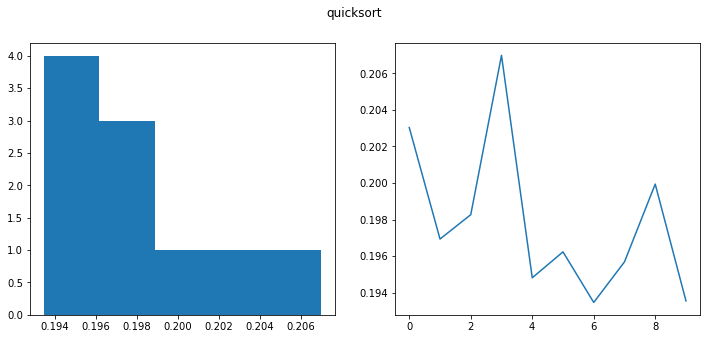

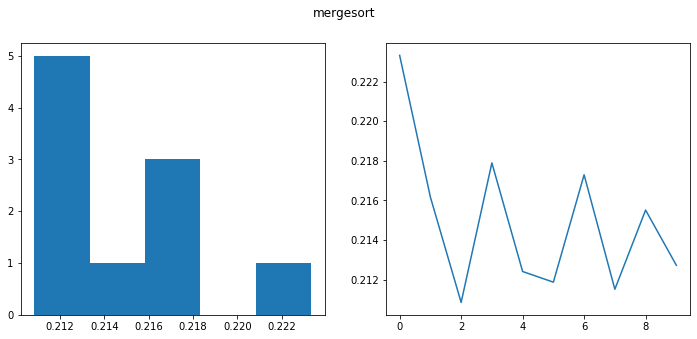

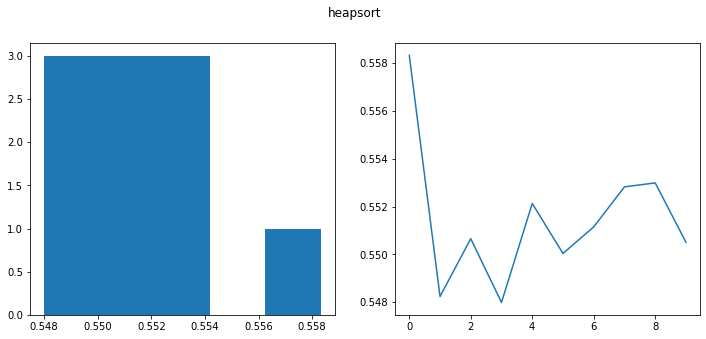

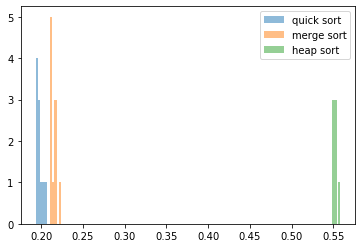

In [53]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_normal, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_normal)

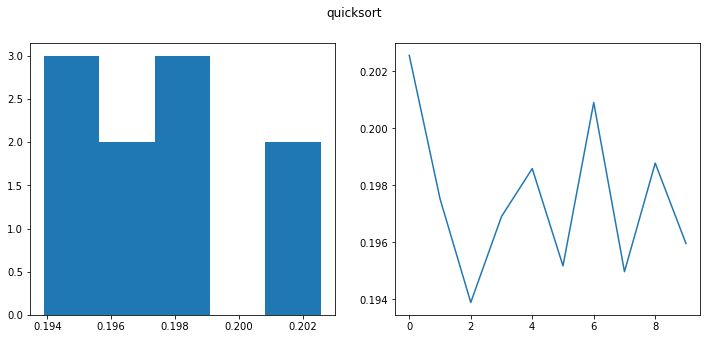

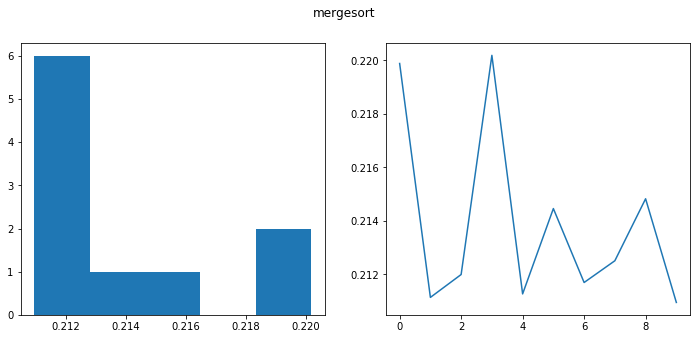

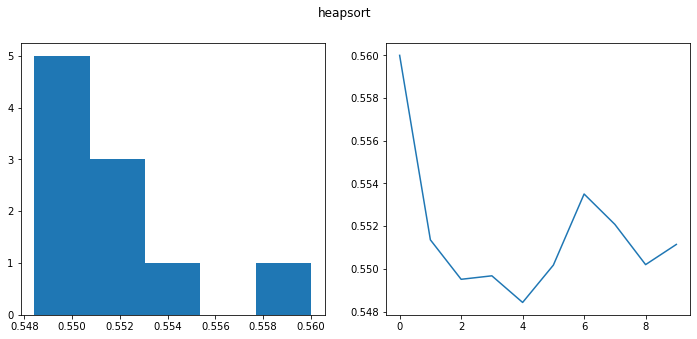

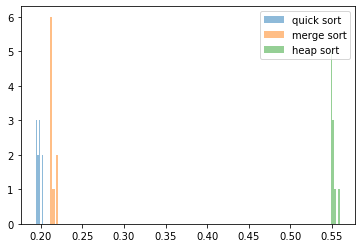

In [54]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_uniform)

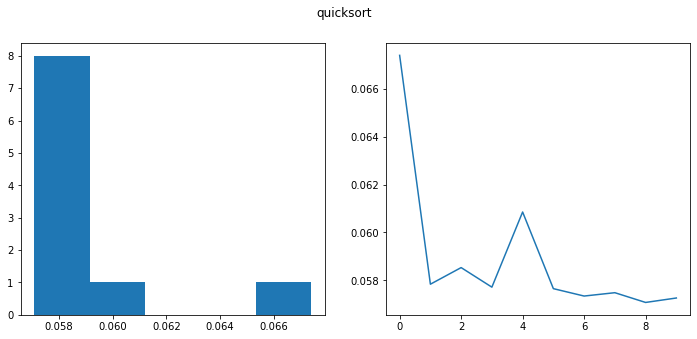

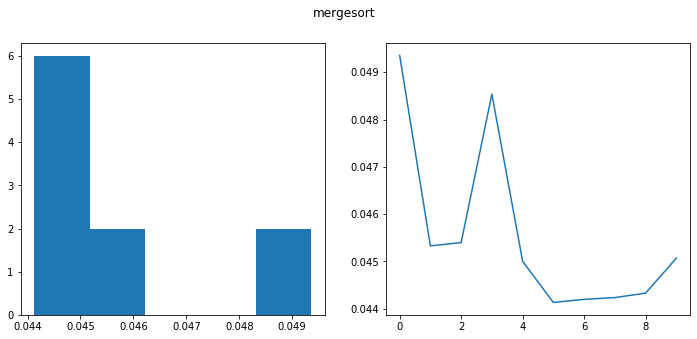

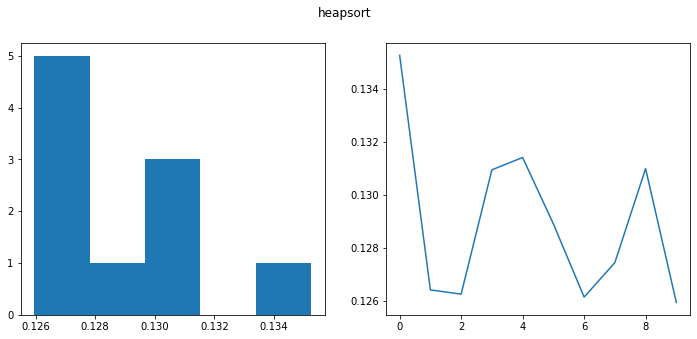

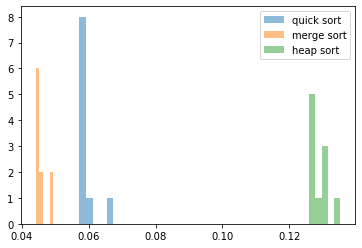

In [55]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_sorted, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_uniform_sorted)

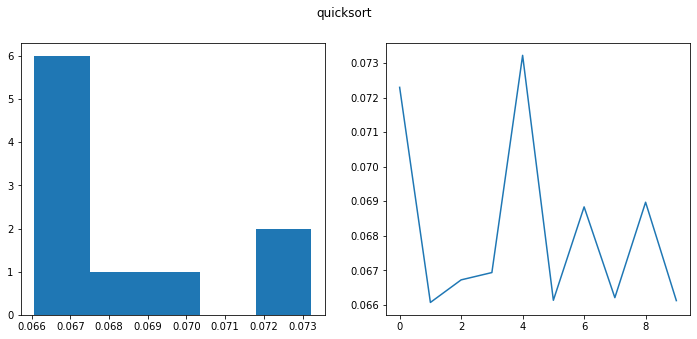

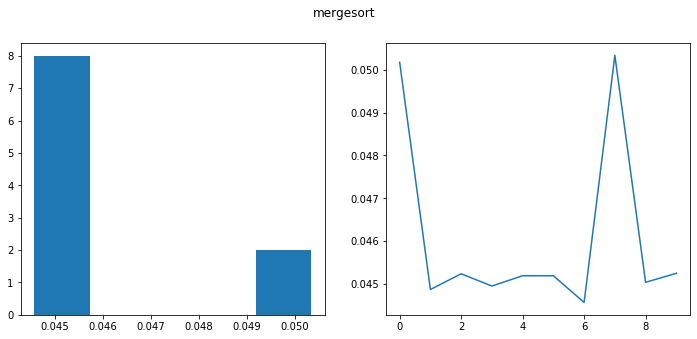

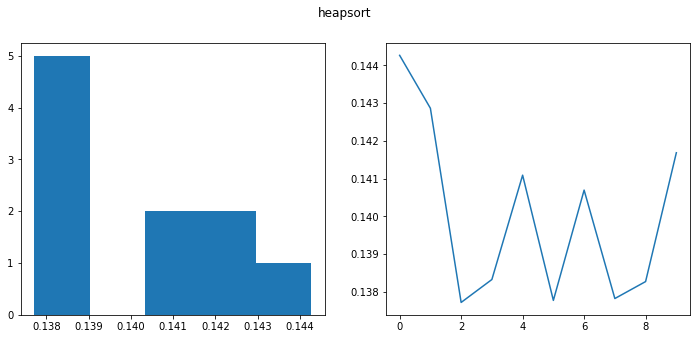

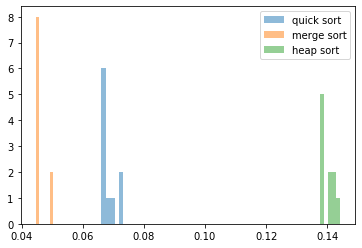

In [56]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_reverse_sorted, algo)
    plot_runtimes(df,std,mean,algo)
plot_runtimes_together(df_uniform_reverse_sorted)

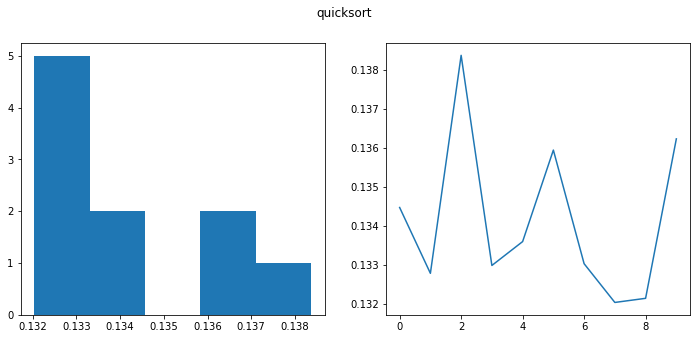

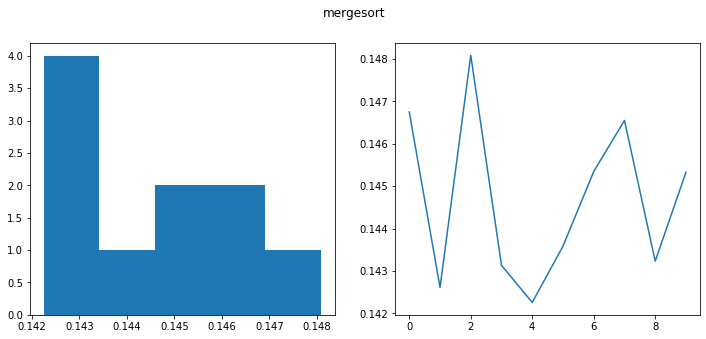

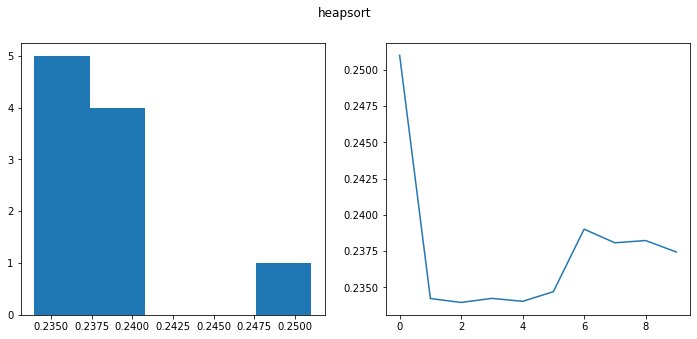

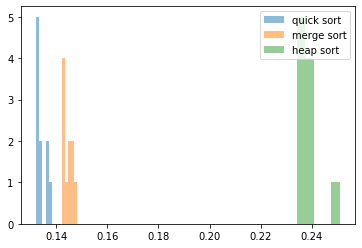

In [57]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_nearly_sorted, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_uniform_nearly_sorted)

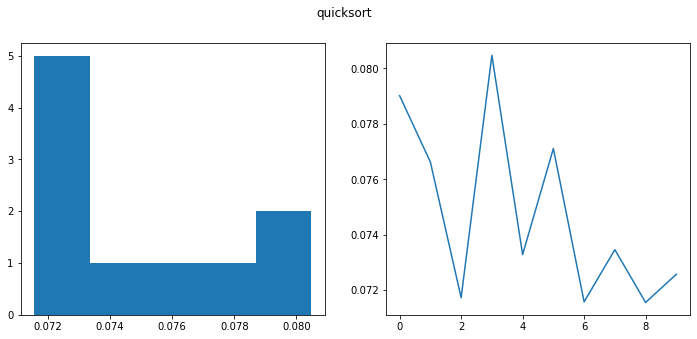

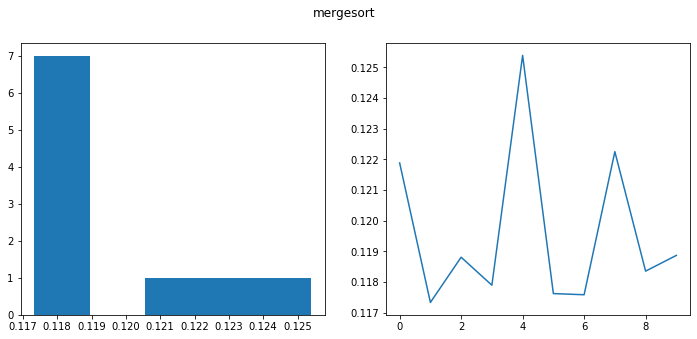

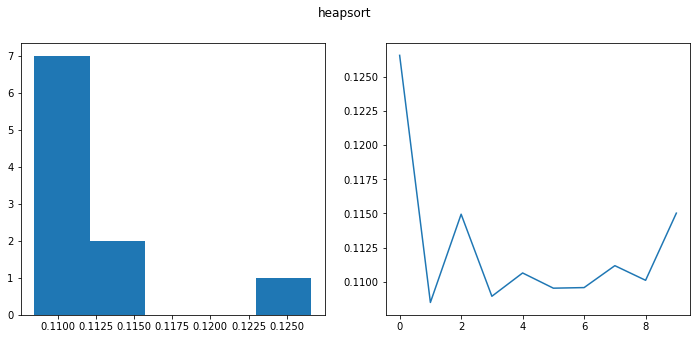

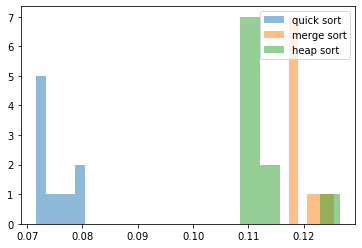

In [58]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_zipf, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_zipf)

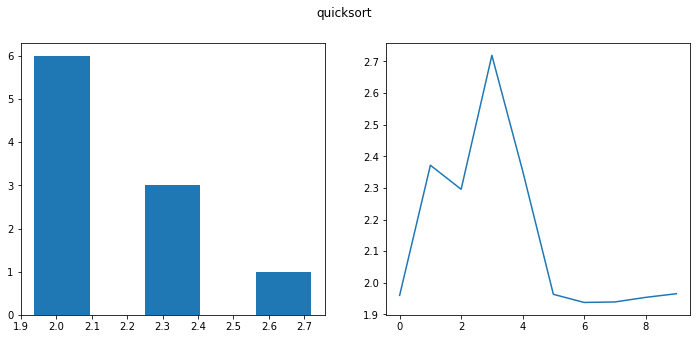

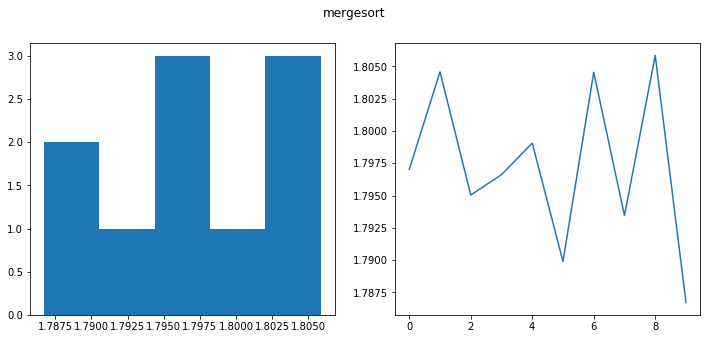

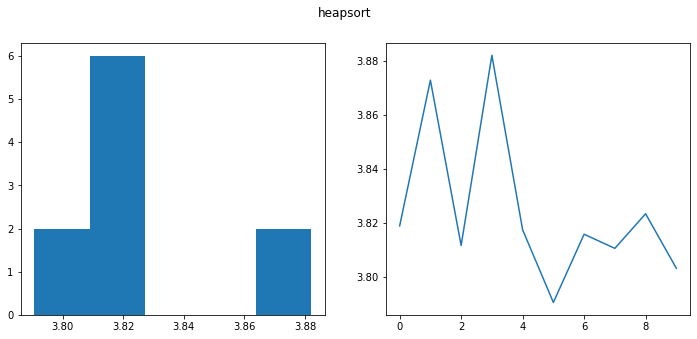

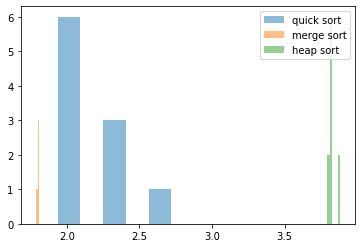

In [59]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_strings, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_strings)

In [60]:
"""for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_dates, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_dates)"""

'for algo in ["quicksort", "mergesort", "heapsort"]:\n    df, std, mean = calculate_stats(df_dates, algo)\n    plot_runtimes(df,std,mean, algo)\nplot_runtimes_together(df_dates)'

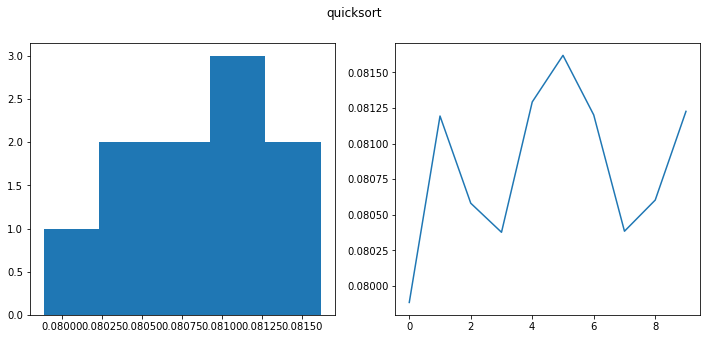

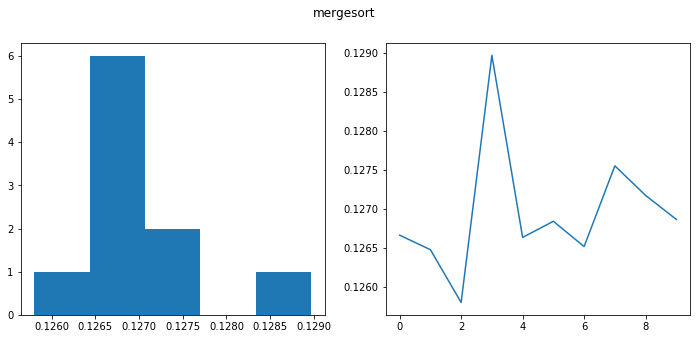

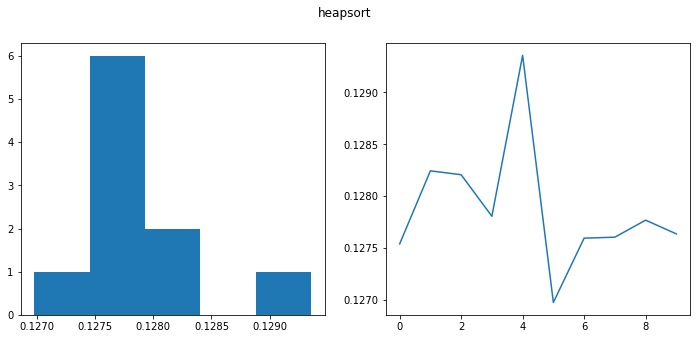

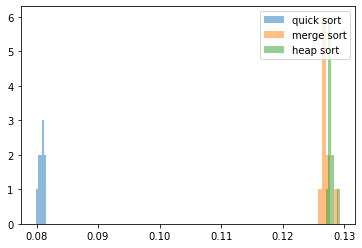

In [61]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers)

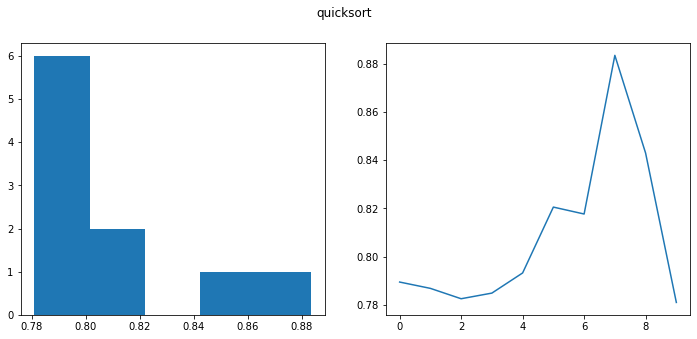

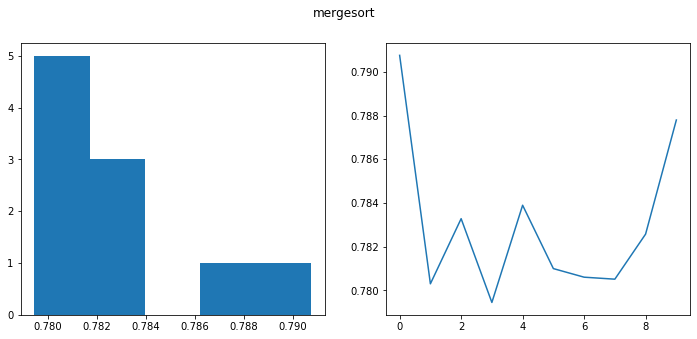

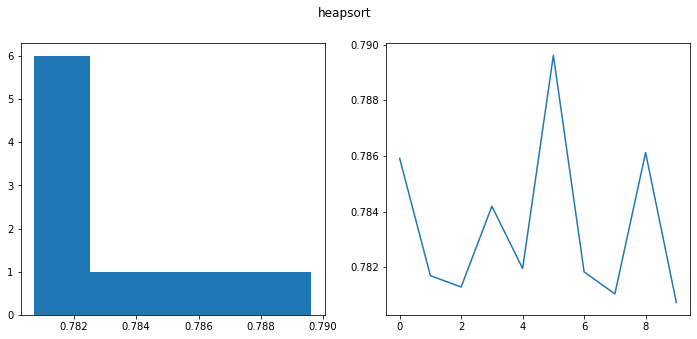

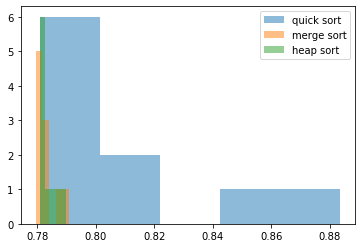

In [62]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_uf_nearly, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_uf_nearly)

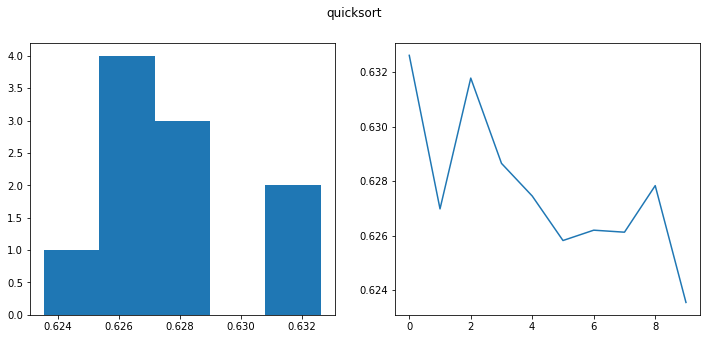

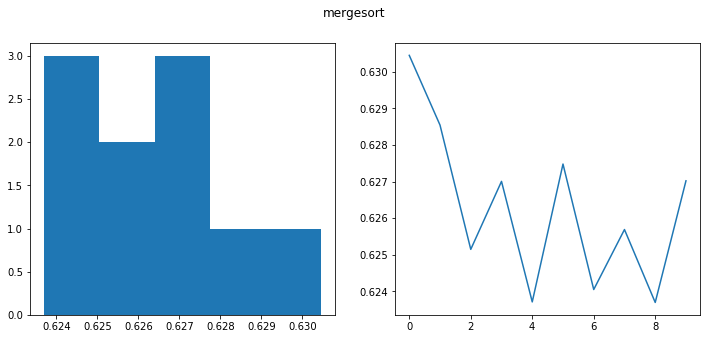

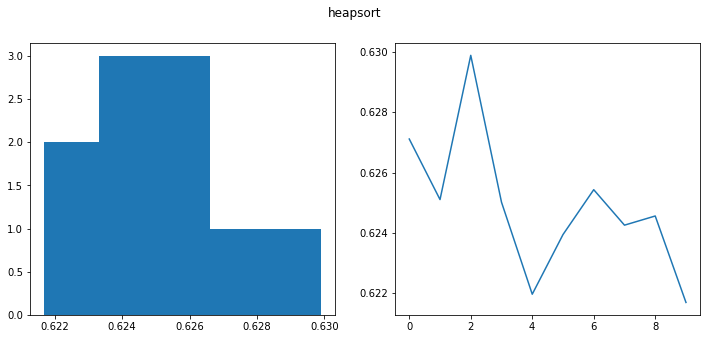

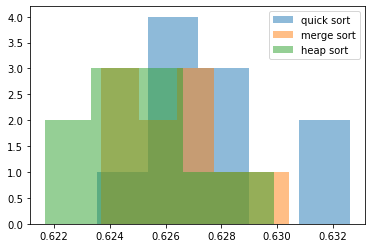

In [63]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_uf_reverse, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_uf_reverse)

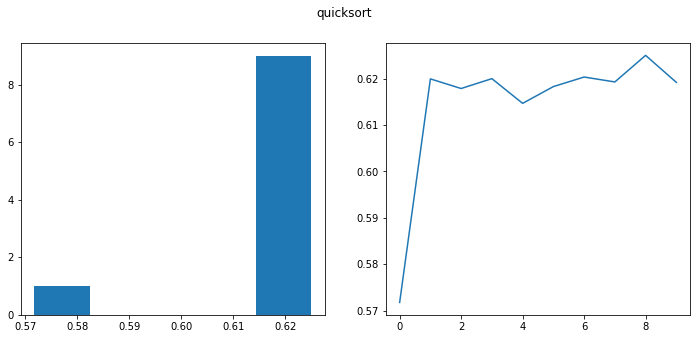

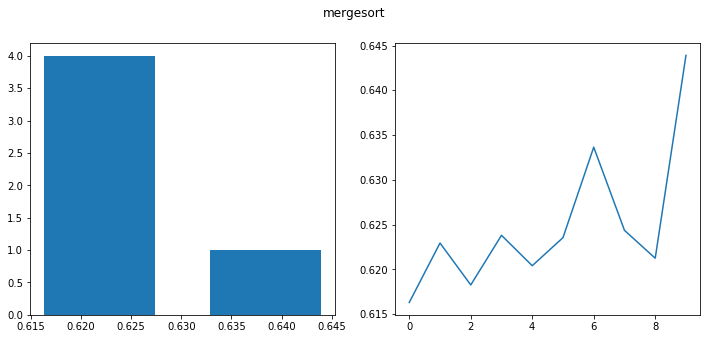

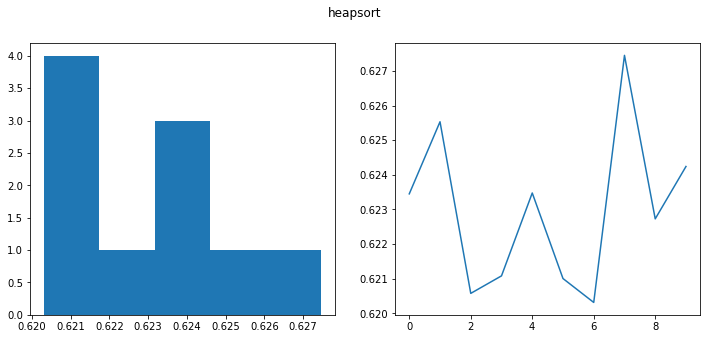

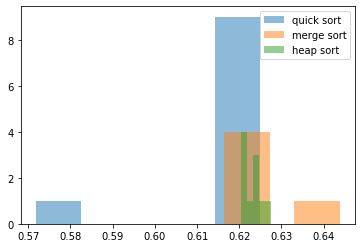

In [64]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_string, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_string)

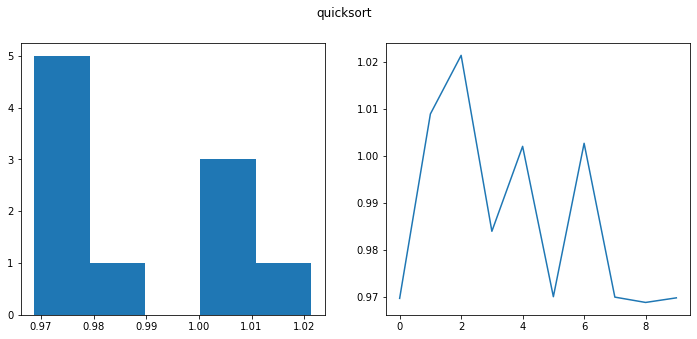

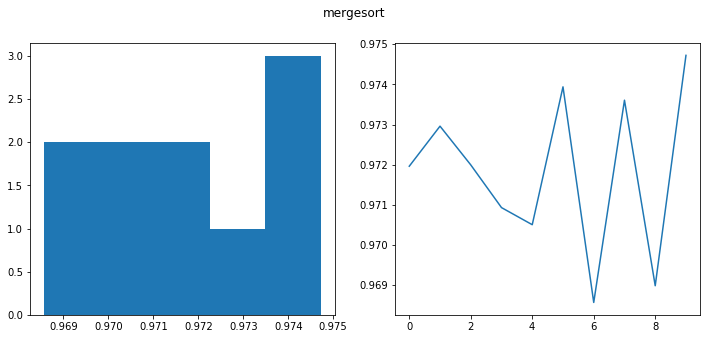

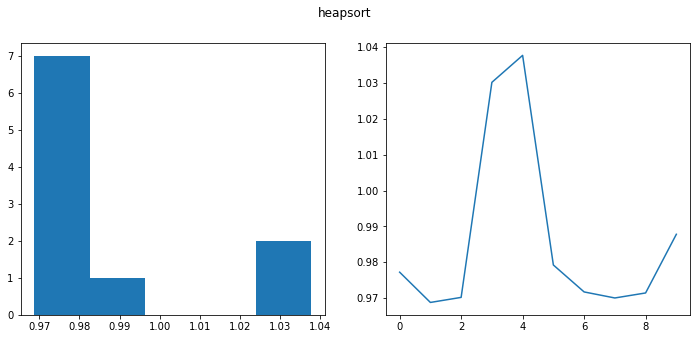

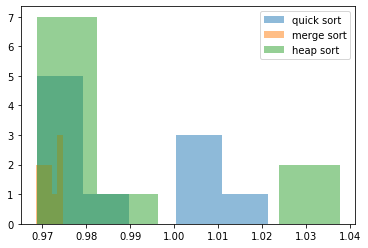

In [65]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_uniform, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_uniform)
